<a href="https://colab.research.google.com/github/cwattsnogueira/rating-predictor-spam-detection-review-summarizer/blob/main/08_02_02_OutlierDetectionPipelinesolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [ ]:
#  Load dataset
df = pd.read_parquet("/content/engineered_features.parquet")
print("Loaded:", df.shape)

Loaded: (9480, 47)


In [ ]:
#  Select features for outlier detection
features = [
    'review_length', 'sentiment_polarity', 'repetition_score',
    'semantic_mismatch_score', 'product_name_match_flag',
    'unrelated_product_flag', 'username_dup_flag'
]

X = df[features].fillna(0)

In [ ]:
#  Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#  Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['outlier_flag'] = iso.fit_predict(X_scaled)

In [ ]:
#  Interpret output
# -1 = outlier, 1 = normal
df['outlier_flag'] = df['outlier_flag'].map({1: 0, -1: 1})

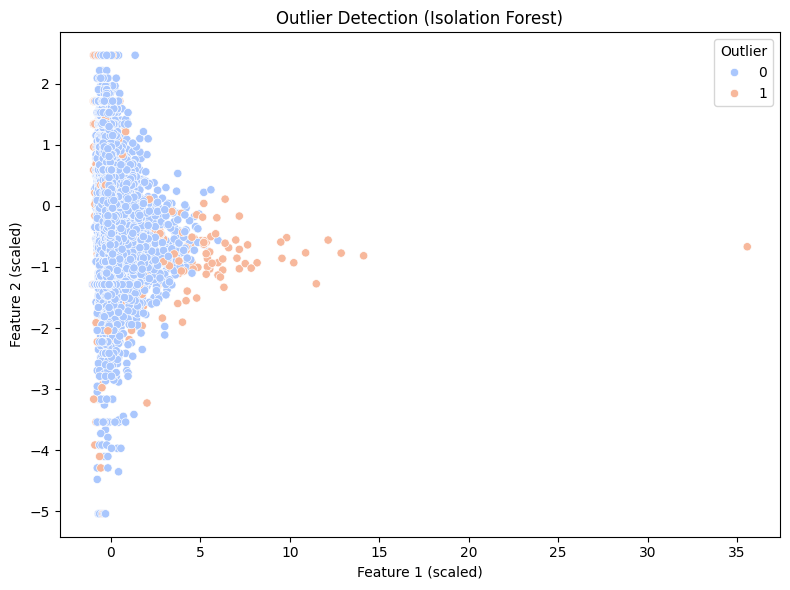

In [ ]:
#  Visualize outliers with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['outlier_flag'], palette='coolwarm')
plt.title("Outlier Detection (Isolation Forest)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Outlier")
plt.tight_layout()
plt.show()

In [ ]:
#  Export flagged dataset
df.to_parquet("/content/review_outliers.parquet", index=False)